In [1]:
from __future__ import division
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import pylab
from os import path
from datetime import datetime
from pyquaternion import Quaternion

In [2]:
# Initialization #
file_path = path.relpath("data/SittingAndTalking.csv")
file = open(file_path, "r")
y = []
x = []
dict = {}
i = 0
index = 0

In [3]:
# Parse the data out of the file #
lines = file.readlines()

for line in lines:
    if i > 1 and line != '\n':
        lineParts = line.strip().split(",")
        dict[i-2] = [lineParts[0], Quaternion(lineParts[1],lineParts[2],lineParts[3],lineParts[4])]

        i += 1
        
    elif line != '\n': #Header
        i += 1

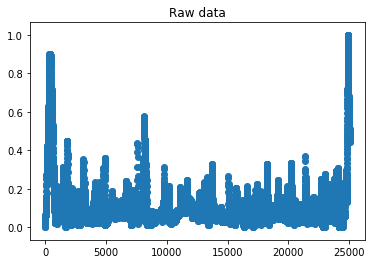

In [4]:
# Graph the distance between the quaternions #
x = []
y = []

prevQuatL = prevQuatR = currQuatL = currQuatR = prevQuat = currQuat = None
i = 0 # keep track of our current iteration
for key, value in dict.items():
    if i == 0 or i == 1: # Special case for initial values
        prevQuat = value[1] # value[1] gives us the quaternion value
        x.append(i)
        y.append(0)
        i += 1
        continue

    currQuat = value[1]
    x.append(i)
    y.append(Quaternion.distance(prevQuat, currQuat)) # Get the distance between the previous quat and the current one
    i += 1       
    continue
    
plt.scatter(x,y)
plt.title("Raw data")
plt.show()



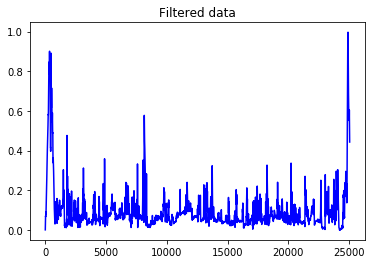

In [6]:
# Filter the data #
y = np.asarray(y)
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, y)

plt.plot(smooth_data,'b-')
plt.title("Filtered data")
plt.show()